# UNAD
## Jorge Humberto Lopez Adan
## hierarchical clustering

## Pasos de la Actividad
1. Realizar un análisis exploratorio de los datos para identificar relaciones entre variables, valores atípicos, tendencias, etc.
2. Preprocesar los datos limpiándolos, tratando valores faltantes y transformándolos según sea necesario
3. Seleccionar las características más relevantes para entrenar el modelo utilizando selección de características
4. Entrenar el modelo configurando los diferentes hiperparámetros
5. Evaluar el desempeño del modelo con métricas como
Coeficiente de Silhouette, Índice de Calinski-Harabasz, etc
6. Realizar las diferentes gráficas que permitan visualizar los resultados del modelo.
7. Interpretar, analizar y documentar los resultados obtenido.s
8. Crear una cuenta en GitHub y cargar los códigos de los modelos diseñados https://github.com/

## 1. Realizar un análisis exploratorio de los datos para identificar relaciones entre variables, valores atípicos, tendencias, etc.

In [19]:
#Cargar las librerias necesarias

import pandas as pd # Manejo y análisis de estructuras de datos
import numpy as np # Cálculo numérico y el análisis de datos
import seaborn as sns # Creación gráficos estadísticos
import matplotlib.pyplot as plt # Creación de gráficos en dos dimensiones
import plotly.graph_objs as go # Creación de gráficos en tres dimensiones
import plotly.express as px # Creación de gráficos en tres dimensiones


# librerías de para implementar modelo Kmeans
from sklearn.cluster import AgglomerativeClustering #algoritmos de agrupamiento o clustering, dividir datos en grupos o clusters basados en su similitud.
from sklearn.preprocessing import StandardScaler #escalar o normalizar los datos
from scipy.cluster.hierarchy import linkage, dendrogram #herramientas para realizar agrupamiento jerárquico y visualización de dendrogramas.
#dendrogram:  genera un gráfico de árbol

# librerías de para evaluar el modelo
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score
from datetime import datetime

#Librería para evitar la advertencia de que el modelo tiene una pérdida de memoria en Windows
import warnings
warnings.filterwarnings('ignore')


In [2]:
# lectura de datos en Python y lo cargamos en la variable Datos

Datos = pd.read_csv('./Mall_Customers.csv')

In [3]:
# Realizamos lectura de los Datos para el análisis exploratorio

Datos.head(40)

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
5,6,Female,22,17,76
6,7,Female,35,18,6
7,8,Female,23,18,94
8,9,Male,64,19,3
9,10,Female,30,19,72


In [4]:
# Descripción de los datos
Datos.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


Text(0.5, 1.0, 'Identificación de Datos Faltantes y Atípicos')

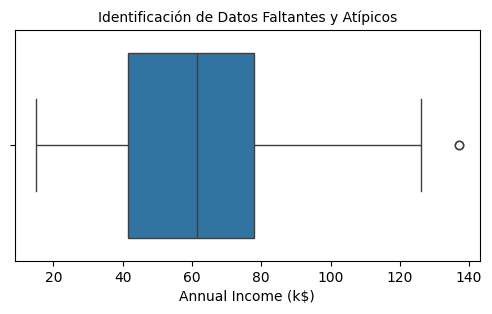

In [5]:
#Identificación de Datos Faltantes y Atípicos

plt.figure(figsize=(6, 3))
sns.boxplot(x=Datos['Annual Income (k$)'])
plt.title('Identificación de Datos Faltantes y Atípicos', fontsize=10 )

## 2. Preprocesar los datos limpiándolos, tratando valores faltantes y transformándolos según sea necesario

In [6]:
#Revisión de datos faltantes

print("Cantidad de Registros con cero en Edad: ",Datos['Age'].isin([0]).sum())
print("Cantidad de Registros con cero en Ingreso Anual: ",Datos['Annual Income (k$)'].isin([0]).sum())
print("Cantidad de Registros con puntaje de gasto en cero: ",Datos['Spending Score (1-100)'].isin([0]).sum())

Cantidad de Registros con cero en Edad:  0
Cantidad de Registros con cero en Ingreso Anual:  0
Cantidad de Registros con puntaje de gasto en cero:  0


In [7]:
# Reemplazar todos los ceros con el valor medio (promedio) de la columna.

Datos['Annual Income (k$)']=Datos['Annual Income (k$)'].replace(0,Datos['Annual Income (k$)'].mean())


Text(0.5, 1.0, 'Identificación de Datos Atípicos')

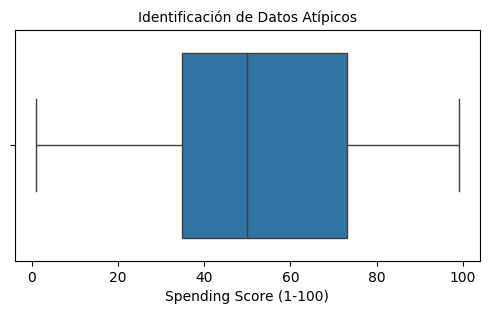

In [8]:
#Identificación de Datos Atípicos

plt.figure(figsize=(6, 3))
sns.boxplot(x=Datos['Spending Score (1-100)'])
plt.title('Identificación de Datos Atípicos', fontsize=10 )

In [9]:
#Conteo de Datos Atípicos

nivel_minimo=0
nivel_maximo=100
Total_Atipicos=((Datos['Spending Score (1-100)']<nivel_minimo)|(Datos['Spending Score (1-100)']>nivel_maximo)).sum()
print("El total de datos atípicos es {}".format(Total_Atipicos))

El total de datos atípicos es 0


In [10]:
# Filtra Datos Atípicos

Datos=Datos[(Datos['Spending Score (1-100)']<nivel_maximo)&(Datos['Spending Score (1-100)']>nivel_minimo)]

In [11]:
#Revisión del tipo de datos y datos faltantes

Datos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


## 3.Seleccionar las características más relevantes para entrenar el modelo utilizando selección de características

Características de interes para el agrupamiento:
* Ingreso ANual
* Puntaje de gasto
* Edad

In [12]:
# Filtrar columnas del modelo

Datos = Datos[["Age","Annual Income (k$)","Spending Score (1-100)"]]


In [13]:
# Revisión de los datos de las variables objetivo

Datos.head(10)

,Age,Annual Income (k$),Spending Score (1-100)
0,19,15,39
1,21,15,81
2,20,16,6
3,23,16,77
4,31,17,40
5,22,17,76
6,35,18,6
7,23,18,94
8,64,19,3
9,30,19,72


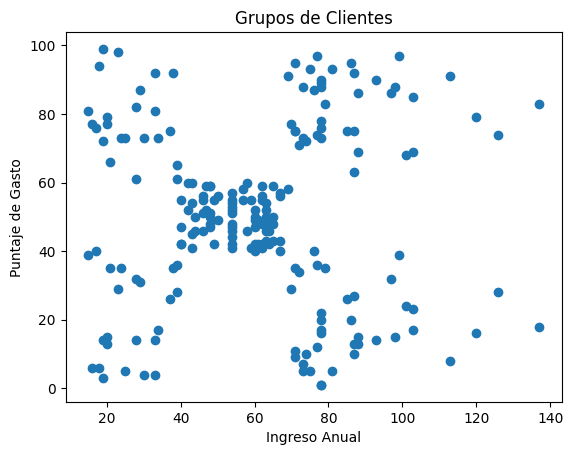

In [14]:
# Grafica antes del agrupamiento

plt.scatter(Datos['Annual Income (k$)'], Datos['Spending Score (1-100)'])
plt.xlabel('Ingreso Anual')
plt.ylabel('Puntaje de Gasto')
plt.title('Grupos de Clientes')
plt.show()

## 4. Entrenar el modelo configurando los diferentes hiperparámetros

Preparación de los Datos Para aplicar el modelo de clustering jerárquico, es recomendable estandarizar los datos si contienen diferentes escalas. Esto se hace con el StandardScaler de scikit-learn, que centra los datos alrededor de 0 y les da una desviación estándar de 1:

In [17]:
scaler = StandardScaler()
scaled_data = scaler.fit_transform(Datos[['Annual Income (k$)', 'Age', 'Spending Score (1-100)']])


Visualización del Dendrograma Antes de aplicar el modelo, es común visualizar el dendrograma para tener una idea de cómo se agruparán los datos. Esto se puede hacer con la función linkage de SciPy y dendrogram para mostrar el árbol de agrupamiento.

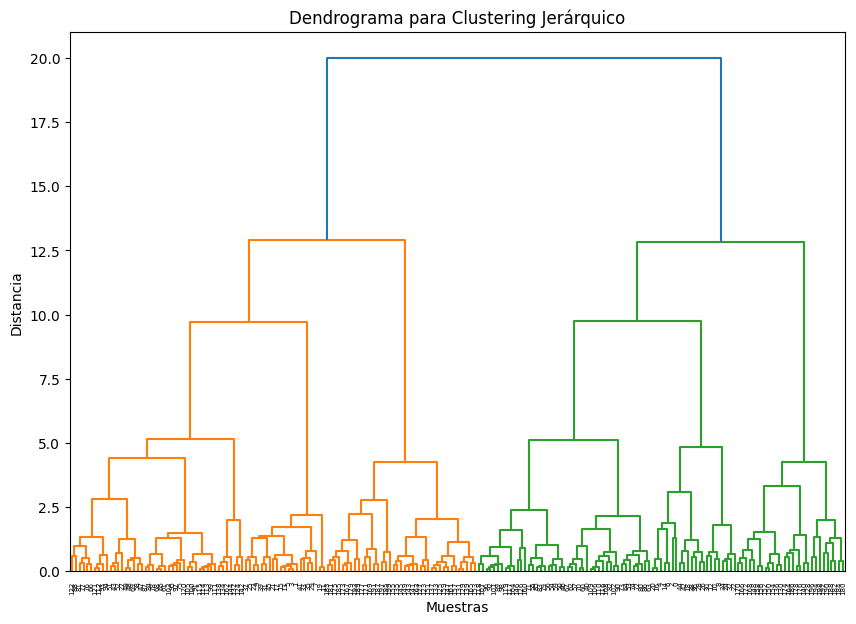

In [20]:
# Check for and handle non-finite values in scaled_data
scaled_data = np.nan_to_num(scaled_data)  # Reemplaza valores NaN, inf y -inf con valores finitos

# Continue with hierarchical clustering
linked = linkage(scaled_data, method='ward') # Realiza el enlace jerárquico con el método de Ward

plt.figure(figsize=(10, 7))
dendrogram(linked, orientation='top', distance_sort='descending', show_leaf_counts=False) # Dibuja el dendrograma
plt.title('Dendrograma para Clustering Jerárquico')
plt.xlabel('Muestras')
plt.ylabel('Distancia')
plt.show()

## 5. Evaluar el desempeño del modelo con métricas como Coeficiente de Silhouette, Índice de Calinski-Harabasz, etc

In [21]:
# Assuming 'Datos' is your DataFrame
# Replace NaNs with the mean of each column
Datos[['Annual Income (k$)', 'Age', 'Spending Score (1-100)']] = Datos[['Annual Income (k$)', 'Age', 'Spending Score (1-100)']].fillna(Datos[['Annual Income (k$)', 'Age', 'Spending Score (1-100)']].mean())

# Preprocesamiento de los datos
scaler = StandardScaler()
scaled_data = scaler.fit_transform(Datos[['Annual Income (k$)', 'Age', 'Spending Score (1-100)']])

# Entrenamiento del modelo de Clustering Jerárquico
model = AgglomerativeClustering(n_clusters=3, linkage='ward')
labels = model.fit_predict(scaled_data)

# Evaluación del modelo

# Coeficiente de Silhouette
sil_score = silhouette_score(scaled_data, labels)
print(f"Coeficiente de Silhouette: {sil_score}")

# Índice de Calinski-Harabasz
ch_score = calinski_harabasz_score(scaled_data, labels)
print(f"Índice de Calinski-Harabasz: {ch_score}")

# Índice de Davies-Bouldin
db_score = davies_bouldin_score(scaled_data, labels)
print(f"Índice de Davies-Bouldin: {db_score}")

Coeficiente de Silhouette: 0.32148866683112387
Índice de Calinski-Harabasz: 88.10174149244529
Índice de Davies-Bouldin: 1.1277290061047858


## 6. Realizar las diferentes gráficas que permitan visualizar los resultados del modelo

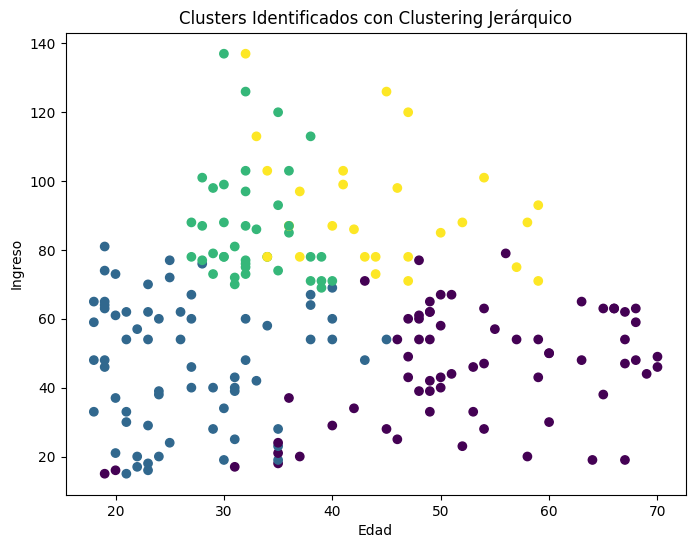

In [24]:
from sklearn.cluster import AgglomerativeClustering
import matplotlib.pyplot as plt

# Aplicar el modelo de clustering jerárquico
model = AgglomerativeClustering(n_clusters=4)  # Ajustar el número de clusters
Datos['Cluster'] = model.fit_predict(scaled_data)
# Graficar los clusters
plt.figure(figsize=(8, 6))
plt.scatter(Datos['Age'], Datos['Annual Income (k$)'], c=Datos['Cluster'], cmap='viridis')
plt.title('Clusters Identificados con Clustering Jerárquico')
plt.xlabel('Edad')
plt.ylabel('Ingreso')
plt.show()

Silhouette Score: 0.3614512741691407


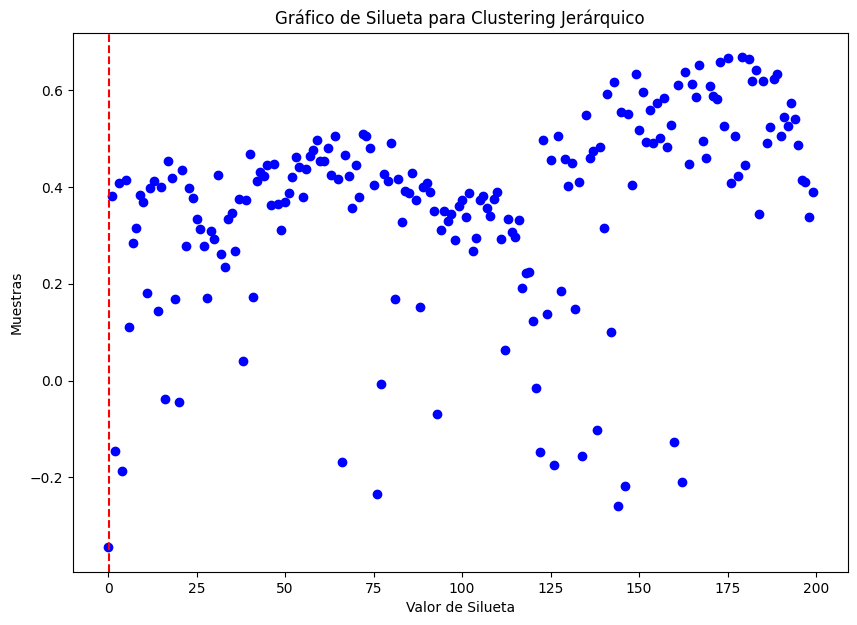

In [25]:
from sklearn.metrics import silhouette_samples, silhouette_score
import matplotlib.pyplot as plt

# Calcular la silueta
silhouette_avg = silhouette_score(scaled_data, model.labels_)
print(f'Silhouette Score: {silhouette_avg}')

# Mostrar el gráfico de silueta
sample_silhouette_values = silhouette_samples(scaled_data, model.labels_)
fig, ax = plt.subplots(figsize=(10, 7))

ax.plot(sample_silhouette_values, 'bo')
ax.axvline(x=silhouette_avg, color="red", linestyle="--")
ax.set_title("Gráfico de Silueta para Clustering Jerárquico")
ax.set_xlabel("Valor de Silueta")
ax.set_ylabel("Muestras")
plt.show()


## 7. Interpretar, analizar y documentar los resultados obtenidos

La edad del cliente puede influyé en sus patrones de compra y preferencias.

En el gráfico de silueta las Silhouettes están mas agrupadas y cercanas a +1, eso nos indica que la mayoría de los puntos están correctamente asignados a su cluster y que los clusters están bien separados.
Un valor de 0.3215 de Coeficiente de Silhouette indica que los clusters no están tan bien separados ni son tan coherentes. Aunque los puntos dentro de cada cluster están algo agrupados, hay cierta superposición entre los clusters, lo que podría sugerir que los grupos podrían no ser perfectamente distintos.
El índice de Calinski-Harabasz es de 88.1 es bastante bajo, lo que sugiere que los clusters no son compactos y no estan bien separados.
Davies-Bouldin de 1.1277 indica que los clusters no son perfectamente separados, pero tampoco son excesivamente dispersos o solapados.



## 8. Crear una cuenta en GitHub y cargar los códigos de los modelos diseñados https://github.com/